###Title: Neural Networks Notes
####Author: Tony Chang
####Abstract: Notes from Michael Nielsen's online book regarding neural networks.
http://neuralnetworksanddeeplearning.com/chap1.html

The first lesson in this book is to understand how one recognizes handwritten digits. It is difficult to explicitly tell a computer that the number '9' is a circle with a tail that sometimes is curved, but sometimes is straight, and sometimes that circle is an oval, etc....So instead of trying do that, we provide a computer a dataset of many examples of '9', and let it learn what it looks like from many examples.

First term to understand is a **Perceptron**. A perceptron is essentially a function that takes in some number of inputs $x$, multiplies them by a weight $w$ and takes the sum (essentially a dot product) and then returns an output provided some logical set of rules and bias $b$ offset on the dot product. 
![perceptron](http://neuralnetworksanddeeplearning.com/images/tikz0.png)

In the simplest case, we can have a perceptron return a 1 or 0 for the given dot product.

$$
\text{output} = \begin{cases} 0, \text{if } w \cdot x + b \le 0 \\1, 
\text{if } w \cdot x + b > 0 \end{cases}
$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#let's build a perceptron!
def perceptron(x, w, b):
    #input x and w arrays and b bias
    #this perceptron builds a NAND gate
    output = np.dot(x,w) + b
    #logical test
    if output > 0:
        return(1)
    elif output <= 0:
        return(0)

In [7]:
x11 = np.array([1,1])
x01 = np.array([0,1])
x10 = np.array([1,0])
x00 = np.array([0,0])
w = np.ones(2) * -2
b = 3
print(perceptron(x11, w, b))
print(perceptron(x01, w, b))
print(perceptron(x10, w, b))
print(perceptron(x00, w, b))

0
1
1
1


Let's see if we can link perceptrons to get a sum of these inputs
![NAND](http://neuralnetworksanddeeplearning.com/images/tikz4.png)

In [8]:
def NAND(x, w, b):
    out1 = perceptron(x,w,b)
    ox1 = np.array([x[0],out1])
    ox2 = np.array([x[1],out1])
    outx1 = perceptron(ox1,w,b)
    outx2 = perceptron(ox2,w,b)
    oxx = np.array([outx1,outx2])
    sumx = perceptron(oxx, w, b)
    carrybit = perceptron(np.array([out1,out1]), w,b) # this is the 2*1 bit (i.e. 2)
    return(sumx, carrybit)    

In [9]:
w = np.ones(2) * -2
b = 3

for x1 in range(2):
    for x2 in range(2):
        x = np.array([x1,x2])
        nandx = NAND(x,w,b)
        print("The sum of 0%d and 0%d is %d%d."%(x1,x2,nandx[1],nandx[0]))

The sum of 00 and 00 is 00.
The sum of 00 and 01 is 01.
The sum of 01 and 00 is 01.
The sum of 01 and 01 is 10.


This looks great, we a neural network used as a NAND gate for computation. So perceptrons can be used for computation in this example.

Now we need to introduce the **Sigmoid neuron**. In the previous example, the perceptron could only provide binary output 0 or 1. But, if we allow the output to be continuous between 0 and 1, then this would allow us to construct a perceptron that can slightly change the output by slight changes in either the weight $w$ or bias $b$.

We remember from statistics, if we want a function to run from 0 to 1 in a continuous manner, we can just use a logistic function:

$$
\sigma(z) = \frac{1}{1+e^{-z}}.
$$

This is also known as the **sigmoid function** in machine learning or neural networks. But, this is a specific case, it can be any function, also called an _activation function_ $f(\cdot)$.

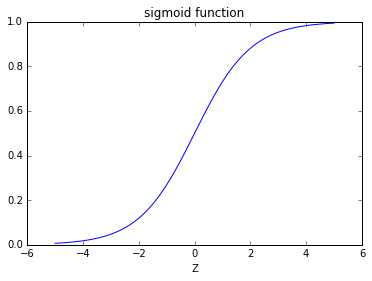

In [10]:
z = np.linspace(-5,5,1000)
def sigmoid(z):
    return(1/(1+np.e**(-z)))
sig = sigmoid(z)
plt.plot(z, sig)
plt.xlabel('Z')
plt.title('sigmoid function')

So we can apply the sigmoid activation function to our perceptron in the form:
$$
\sigma(w \cdot x + b) = \text(output)
$$
Noting that small changes in $w$ and $b$ can create small changes in the output:
$$
\Delta\text{output} \approx \sum_j \frac{\partial\text{output}}{\partial w_j} \Delta w_j + \frac{\partial\text{output}}{\partial b}\Delta b
$$

###Exercise 1: Sigmoid neurons simulating perceptrons, part I - Suppose we take all the weights and biases in a network of perceptrons, and multiply them by a positive constant, $c>0$. Show that the behaviour of the network doesn't change.

In [11]:
w = np.ones(2) * -2
b = 3
c = np.random.random(1) * (np.random.random(1)*10)
w = w * c
b = b * c
for x1 in range(2):
    for x2 in range(2):
        x = np.array([x1,x2])
        nandx = NAND(x,w,b)
        print("The sum of 0%d and 0%d is %d%d."%(x1,x2,nandx[1],nandx[0]))
print("c = %f"%c)

The sum of 00 and 00 is 00.
The sum of 00 and 01 is 01.
The sum of 01 and 00 is 01.
The sum of 01 and 01 is 10.
c = 1.723413


The behaviour of the NAND perceptron does not change with constant $c > 0$ multiplying $w$ and $b$

###Exercise 2: Sigmoid neurons simulating perceptrons, part II - Suppose we have the same setup as the last problem - a network of perceptrons. Suppose also that the overall input to the network of perceptrons has been chosen. We won't need the actual input value, we just need the input to have been fixed. Suppose the weights and biases are such that $w⋅x+b≠0$ for the input x to any particular perceptron in the network. Now replace all the perceptrons in the network by sigmoid neurons, and multiply the weights and biases by a positive constant c>0. Show that in the limit as $c→∞$ the behaviour of this network of sigmoid neurons is exactly the same as the network of perceptrons. How can this fail when $w⋅x+b=0$ for one of the perceptrons?

if $c \rightarrow \infty$ then $z \rightarrow -\infty$ so the value sigmoid neuron approaches 0. If $w \cdot x + b =0$ then our sigmoid will equal $\frac{1}{1+1}$ which equals $\frac{1}{2}$. This is not an output of our perceptron?

In [12]:
#let's build a this perceptron!
#in this case w dot x + b can not equal 0, so x is some fixed value. Let's use x = np.array([1,1])
def sigmoid(x, w, b):
    #input x and w arrays and b bias
    #this perceptron builds a NAND gate
    output = 1/(1+ np.e**(-1*(np.dot(x,w) + b)))
    #logical test
    return(output)

[[ 1.   1.5  0.   0.  -0.5]
 [ 1.5  2.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [-0.5  0.   0.   0.  -2. ]]
[[ 28.  27.   0.   0.  31.]
 [ 27.  26.   0.   0.  30.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [ 31.  30.   0.   0.  34.]]
[[ 1.  1.  0.  0.  1.]
 [ 1.  1.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  0.  0.  1.]]


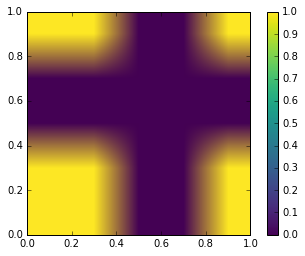

In [13]:
j = 5
w = np.ones(2) *-2
b = 30
o = np.zeros((j,j))
zs = np.zeros((j,j))
xs = np.zeros((j,j))
r = np.linspace(-1,1,j)

for x1 in r:
    for x2 in r:
        x = np.array([x1,x2])
        xs[x1,x2] = np.sum(x)
        zs[x1,x2] = np.dot(x,w) + b
        o[x1,x2]=sigmoid(x,w,b)
print(xs)
print(zs)
print(o)
plt.set_cmap('viridis')
plt.imshow(o, origin = 'lower', extent = [o.min(), o.max(), o.min(), o.max()]); plt.colorbar()

Think about this exercise more....

###Introducing the cost function
So the first cost function introduced is:
$$
C(w,b) \equiv \frac{1}{2n} \sum_x \parallel y(x) - a \parallel^2
$$
Which is just the mean squared error. Where $a$ is a vector of length $n$ (total number of training values) the correct classifications for the numbers (0,9), represented in binary (1 is the class and 0 is not the class), and $y(x)$ is the output from the neural network.

We would like to minimize this cost function. So let's consider what a cost function could look like. Imagining a case for 2 variables $v_1$ and $v_2$ we can visualize a cost function as:
![cost_func](http://neuralnetworksanddeeplearning.com/images/valley.png)

Using this cost function we can find what values of $v$, the variables (or the weights and the bias in our perceptron model), that we should use by taking the gradient of $C$ (the partial derivatives in terms of each input variable) times some negative learning rate $\eta$. We use this value to change our next input weight and bias for the each training data set. It should be noted that this would mean that we adjust the weight and bias with each individual training data input $n$ and take the mean of it which could take a great deal of time. One solution is to take a subset of the data of size $m$ randomly and calculate the gradient of the cost function on those only, this known as *stochastic gradient descent*. 

##Coding the neural network

In [14]:
#define the neural network object
class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])]

In [32]:
#instantiate a network with 2 neurons in the first layer (two inputs), 3 in the second (3x2 weights, and 3x1 biases), 
#and one in the third (1x3 weights and 1 bias)
net = Network([2, 3, 1])

In [37]:
#we can see this if we inspect weights and bias. They are drawn from a Gaussian distribution as a start
net.weights

[array([[-0.31095052, -0.19525162],
        [-0.02360752,  2.65249676],
        [ 0.32104061,  0.11977198]]),
 array([[-1.09412191,  0.3490986 , -2.06342049]])]

In [38]:
#define sigmoid function again
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [46]:
#reminder of what "zip" does
a = np.arange(1,5)
b = np.arange(3,8)
for i,j in zip(a,b):
    print(i,j)

1 3
2 4
3 5
4 6


In [125]:
import random
#define the neural network object
class Network(object):
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) 
                        for x, y in zip(sizes[:-1], sizes[1:])]
        
    #now define stochastic gradient descent
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The "training_data" is a list of tuples
        "(x, y)" representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If "test_data" is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        if test_data: 
            n_test = len(test_data)
        n = len(training_data)
        for j in range(epochs):
            random.shuffle(training_data) #shuffle up the training data
            mini_batches = [
                training_data[k:k+mini_batch_size] 
                for k in range(0, n, mini_batch_size)] #make a mini batch of mini_batch_size
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print("Epoch %i %i / %i"%(j, self.evaluate(test_data), n_test))
            else:
                print("Epoch %i complete"%j)

    #define the update_mini_batch function as well
    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The "mini_batch" is a list of tuples "(x, y)", and "eta"
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases] #creates place holder for the biases
        nabla_w = [np.zeros(w.shape) for w in self.weights] #creates place holder for the weights
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw 
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb 
                       for b, nb in zip(self.biases, nabla_b)]

    #functions for calculating the cost function and gradient of cost function
    def feedforward(self, a):
        """Return the output of the network if "a" is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return(a)

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)

#### Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

In [126]:
%load_ext autoreload
%autoreload 2
%run mnist_loader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [127]:
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [128]:
#initialize our network for the MNIST data with 30 hidden layers and 10 final layers.
net = Network([784, 30, 10])

In [129]:
net.SGD(training_data, 30, 10, 3.0, test_data=test_data) #run the stochastic gradient descent 

Epoch 0 9135 / 10000
Epoch 1 9247 / 10000
Epoch 2 9319 / 10000
Epoch 3 9346 / 10000
Epoch 4 9403 / 10000
Epoch 5 9410 / 10000
Epoch 6 9436 / 10000
Epoch 7 9431 / 10000
Epoch 8 9444 / 10000
Epoch 9 9431 / 10000
Epoch 10 9466 / 10000
Epoch 11 9491 / 10000
Epoch 12 9459 / 10000
Epoch 13 9463 / 10000
Epoch 14 9453 / 10000
Epoch 15 9462 / 10000
Epoch 16 9495 / 10000
Epoch 17 9466 / 10000
Epoch 18 9451 / 10000
Epoch 19 9478 / 10000
Epoch 20 9486 / 10000
Epoch 21 9478 / 10000
Epoch 22 9475 / 10000
Epoch 23 9503 / 10000
Epoch 24 9489 / 10000
Epoch 25 9513 / 10000
Epoch 26 9445 / 10000
Epoch 27 9498 / 10000
Epoch 28 9489 / 10000
Epoch 29 9499 / 10000
